# GoNB - A Go Notebook Kernel for Jupyter

See the [tutorial in github](https://github.com/janpfeifer/gonb/blob/e15ac2e8e3fe/examples/tutorial.ipynb). The repository is in [github.com/janpfeifer/gonb](https://github.com/janpfeifer/gonb).



## Installation in Google's Colab

Run the following cell once only. It will install Go, GoNB and restart the kernel so it uses Go instead of the provided Python.

It takes a couple of minutes ... but only needs to be done once.

When creating other GoNB notebooks with Google's Colab, you will have to copy the cell below (or do something similar).

**Disclaimer**: this is highly not documented or official, but seems to be supported by Colab (it works). Likely this way of replacing the kernel will break without notice. Please reach out to project in [github.com/janpfeifer/gonb](https://github.com/janpfeifer/gonb) if there are any issues.


In [ ]:
#@title Install Go, `goimports` and Gote code.

# Install Go and goimports.
!mkdir -p cache
!wget -q -O cache/go.tar.gz 'https://go.dev/dl/go1.20.linux-amd64.tar.gz'
!tar xzf cache/go.tar.gz
%env GOROOT=/content/go
!ln -sf "/content/go/bin/go" /usr/bin/go
!go version

# Install gonb, goimports, gopls.
!go install github.com/janpfeifer/gonb@latest 2> /dev/null
!ln -sf /root/go/bin/gonb /usr/bin/gonb
!go install golang.org/x/tools/cmd/goimports@latest  2> /dev/null
!ln -sf /root/go/bin/goimports /usr/bin/goimports
!go install golang.org/x/tools/gopls@latest  2> /dev/null
!ln -sf /root/go/bin/gopls /usr/bin/gopls

# Install gonb kernel configuration.
!gonb --install

# Python code to replace ipython kernel with GoNB.
import os
import ipykernel_launcher

call_kernel_code='''
import os
import sys

connection_file = sys.argv[2]
os
try:
  os.execl("/usr/bin/gonb", "/usr/bin/gonb", "--kernel", connection_file)
finally:
  from ipykernel import kernelapp as app
  app.launch_new_instance()
'''
new_file = '/tmp/gonb_ipykernel_launcher.py'
# old_file = '/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py'
old_file = ipykernel_launcher.__file__
with open(new_file, 'w') as f:
  f.write(call_kernel_code)
os.replace(new_file, old_file)

# Finally kill current kernel to force restart.
import os; import sys; sys.stdout.flush(); os.kill(os.getpid(), 9)


env: GOROOT=/content/go
go version go1.20 linux/amd64
[3d60d1eb] 2023/02/12 11:03:33 Go (gonb) kernel configuration installed in "/root/.local/share/jupyter/kernels/gonb/kernel.json".


The cell above will crash the current kernel after replacing it with GoNB. It's normal. Run it once only, it takes a couple of minutes. After that you will be running a GoNB kernel.

## Demo

From here below you can delete and put your own code.


First ...

In [2]:
%%
fmt.Printf("Hello World!")

Hello World!

In [4]:
import "bytes"
import svgo "github.com/ajstarks/svgo"
import "github.com/janpfeifer/gonb/gonbui"

func Shining(width, height int) string {
    buf := bytes.NewBuffer(nil)
    canvas := svgo.New(buf)
    xp := []int{50, 70, 70, 50, 30, 30}
    yp := []int{40, 50, 75, 85, 75, 50}
    xl := []int{0, 0, 50, 100, 100}
    yl := []int{100, 40, 10, 40, 100}
    bgcolor := "rgb(227,78,25)"
    bkcolor := "rgb(153,29,40)"
    stcolor := "rgb(65,52,44)"
    stwidth := 12
    stylefmt := "stroke:%s;stroke-width:%d;fill:%s"
    canvas.Start(width, height)
    canvas.Def()
    canvas.Gid("unit")
    canvas.Polyline(xl, yl, "fill:none")
    canvas.Polygon(xp, yp)
    canvas.Gend()
    canvas.Gid("runit")
    canvas.TranslateRotate(150, 180, 180)
    canvas.Use(0, 0, "#unit")
    canvas.Gend()
    canvas.Gend()
    canvas.DefEnd()
    canvas.Rect(0, 0, width, height, "fill:"+bgcolor)
    canvas.Gstyle(fmt.Sprintf(stylefmt, stcolor, stwidth, bkcolor))
    for y := 0; y < height; y += 130 {
        for x := -50; x < width; x += 100 {
            canvas.Use(x, y, "#unit")
            canvas.Use(x, y, "#runit")
        }
    } 
    canvas.Gend()
    canvas.End()
    return buf.String()
}

%%
gonbui.DisplaySVG(Shining(500, 500))

<?xml version="1.0"?>
<!-- Generated by SVGo -->

lastRenderTime=15.59365


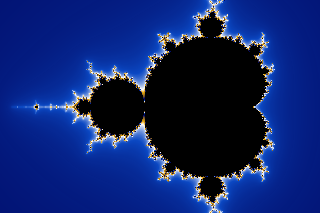

In [5]:
import "github.com/benc-uk/gofract/pkg/fractals"
import "github.com/benc-uk/gofract/pkg/colors"

%%
imgWidth := 320

// Default fractal
f := fractals.Fractal{
    FractType:    "mandelbrot",
    Center:       fractals.ComplexPair{-0.6, 0.0},
    MagFactor:    1.0,
    MaxIter:      90,
    W:            3.0,
    H:            2.0,
    ImgWidth:     imgWidth,
    JuliaSeed:    fractals.ComplexPair{0.355, 0.355},
    InnerColor:   "#000000",
    FullScreen:   false,
    ColorRepeats: 2,
}
gradient := colors.GradientTable{}
gradient.AddToTable("#000762", 0.0)
gradient.AddToTable("#0B48C3", 0.2)
gradient.AddToTable("#ffffff", 0.4)
gradient.AddToTable("#E3A000", 0.5)
gradient.AddToTable("#000762", 0.9)
imgHeight := int(float64(imgWidth) * float64(f.H/f.W))
img := image.NewRGBA(image.Rect(0, 0, f.ImgWidth, imgHeight))
lastRenderTime := f.Render(img, gradient)
fmt.Printf("lastRenderTime=%v\n", lastRenderTime)
gonbui.DisplayImage(img)

In [6]:
!*go get -u github.com/erkkah/margaid@d60b2efd2f5acc5d8fbbe13eaf85f1532e11a2fb

go: downloading github.com/erkkah/margaid v0.1.1-0.20230128143048-d60b2efd2f5a
go: added github.com/erkkah/margaid v0.1.1-0.20230128143048-d60b2efd2f5a


In [7]:
import "bytes"
import "github.com/janpfeifer/gonb/gonbui"
import mg "github.com/erkkah/margaid"

func mgPlot(width, height int) string {
    randomSeries := mg.NewSeries()
    rand.Seed(time.Now().Unix())
    for i := float64(0); i < 10; i++ {
        randomSeries.Add(mg.MakeValue(i+1, 200*rand.Float64()))
    }

    testSeries := mg.NewSeries()
    multiplier := 2.1
    v := 0.33
    for i := float64(0); i < 10; i++ {
        v *= multiplier
        testSeries.Add(mg.MakeValue(i+1, v))
    }

    diagram := mg.New(width, height,
        mg.WithAutorange(mg.XAxis, testSeries),
        mg.WithAutorange(mg.YAxis, testSeries),
        mg.WithAutorange(mg.Y2Axis, testSeries),
        mg.WithProjection(mg.YAxis, mg.Log),
        mg.WithInset(70),
        mg.WithPadding(2),
        mg.WithColorScheme(90),
        mg.WithBackgroundColor("#f8f8f8"),
    )

    diagram.Line(testSeries, mg.UsingAxes(mg.XAxis, mg.YAxis), mg.UsingMarker("square"), mg.UsingStrokeWidth(1))
    diagram.Smooth(testSeries, mg.UsingAxes(mg.XAxis, mg.Y2Axis), mg.UsingStrokeWidth(3.14))
    diagram.Smooth(randomSeries, mg.UsingAxes(mg.XAxis, mg.YAxis), mg.UsingMarker("filled-circle"))
    diagram.Axis(testSeries, mg.XAxis, diagram.ValueTicker('f', 0, 10), false, "X")
    diagram.Axis(testSeries, mg.YAxis, diagram.ValueTicker('f', 1, 2), true, "Y")

    diagram.Frame()
    diagram.Title("A diagram of sorts 📊 📈")
    buf := bytes.NewBuffer(nil)
    diagram.Render(buf)
    return buf.String()
}

%%
gonbui.DisplaySVG(mgPlot(640, 480))

<path vector-effect="non-scaling-stroke" d="M1.000000e+01,6.800000e+00 C1.888889e+01,6.875434e+00 4.555556e+01,7.018758e+00 6.333333e+01,7.252602e+00 C8.111111e+01,7.486446e+00 9.888889e+01,7.711993e+00 1.166667e+02,8.203066e+00 C1.344444e+02,8.694139e+00 1.522222e+02,9.167786e+00 1.700000e+02,1.019904e+01 C1.877778e+02,1.123029e+01 2.055556e+02,1.222495e+01 2.233333e+02,1.439059e+01 C2.411111e+02,1.655622e+01 2.588889e+02,1.864500e+01 2.766667e+02,2.319283e+01 C2.944444e+02,2.774066e+01 3.122222e+02,3.212711e+01 3.300000e+02,4.167755e+01 C3.477778e+02,5.122798e+01 3.655556e+02,6.043953e+01 3.833333e+02,8.049545e+01 C4.011111e+02,1.005514e+02 4.188889e+02,1.198956e+02 4.366667e+02,1.620130e+02 C4.544444e+02,2.041305e+02 4.811111e+02,3.046688e+02 4.900000e+02,3.332000e+02 "/> <path vector-effect="non-scaling-stroke" d="M1.000000e+01,1.944093e+02 C1.888889e+01,2.040691e+02 4.555556e+01,2.446602e+02 6.333333e+01,2.523682e+02 C8.111111e+01,2.600762e+02 9.888889e+01,2.426470e+02 1.166667e+02,2.406573e+02 C1.344444e+02,2.386677e+02 1.522222e+02,2.339127e+02 1.700000e+02,2.404303e+02 C1.877778e+02,2.469478e+02 2.055556e+02,2.727042e+02 2.233333e+02,2.797627e+02 C2.411111e+02,2.868213e+02 2.588889e+02,2.845107e+02 2.766667e+02,2.827814e+02 C2.944444e+02,2.810522e+02 3.122222e+02,2.725550e+02 3.300000e+02,2.693873e+02 C3.477778e+02,2.662196e+02 3.655556e+02,2.635933e+02 3.833333e+02,2.637753e+02 C4.011111e+02,2.639572e+02 4.188889e+02,2.697684e+02 4.366667e+02,2.704791e+02 C4.544444e+02,2.711897e+02 4.811111e+02,2.684458e+02 4.900000e+02,2.680391e+02 "/> 1 2 3 4 5 6 7 8 9 10 X 1.0 2.0 4.0 8.0 16.0 32.0 64.0 128.0 256.0 512.0 Y A diagram of sorts 📊 📈

# More ... and Help

In [8]:
%help

GoNB is a Go kernel that compiles and executed on-the-fly Go code. 

When executing a cell, *GoNB* will save the cell contents (except non-Go commands see
below) into a "main.go" file, compile and execute it.

It also saves any global declarations (imports, functions, types, variables, constants)
and reuse them at the next cell execution -- so you can define a function in one
cell, and reuse in the next one. Just the "func main()" is not reused.

A "hello world" example would look like:

	func main() {
		fmt.Printf("Hello world!\n");
	}

But to avoid having to type "func main()" all the time, you can use "%%" and everything
after is wrapped inside a "func main() { ... }". So our revised "hello world" looks like:

	%%
	fmt.Printf("Hello world!\n")


- "init()" functions: since there is always only one definition per function name, 
  it's not possible for each cell to have it's own init() function. Instead GoNB
  converts any function named "init_<my_stuff>()" to "init()" before compili